# Equivalent layer technique for estimating total magnetization direction using regular grid

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'regular_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_polyprism.pickle') as f:
        model_polyprism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/regular_grid.pickle') as f:
        reg_grid = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_reg = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (reg_grid['area'][1], 
                                                                                                reg_grid['area'][0],
                                                                                                reg_grid['area'][3],
                                                                                                reg_grid['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### reg_grid survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% reg_grid['shape'] 
print 'Number of data: %.1f' % reg_grid['N']
print 'dx: %.1f m' % reg_grid['dx']
print 'dy: %.1f m ' % reg_grid['dy']

Shape : (25,25)
Number of data: 625.0
dx: 500.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_polyprism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 30.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_polyprism['m_R']
print 'Inclination: %.1f degree' % model_polyprism['inc_R']
print 'Declination: %.1f degree' % model_polyprism['dec_R']

Intensity: 5.0 A/m
Inclination: 55.0 degree
Declination: 40.0 degree


In [16]:
inc_R,dec_R = model_polyprism['inc_R'],model_polyprism['dec_R']

## Generating the layer with my function 

In [17]:
h = 1500.

#### Generating a layer

In [18]:
shape_layer = (reg_grid['shape'][0],reg_grid['shape'][1])

In [19]:
xs,ys,zs = regular(reg_grid['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,5*2e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_polyprism_RM_reg'],reg_grid['x'],reg_grid['y'],
        reg_grid['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_polyprism_RM_reg'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
2.28582178674 0.426062449598
i = 1
10.0152870797 3.22310719288
i = 2
14.995395899 4.70367422224
i = 3
18.6868599779 5.6071883129
i = 4
21.6313316778 6.32344577688
i = 5
24.0455175114 6.97094443362
i = 6
26.0799653936 7.5752498586
i = 7
27.8308001742 8.14105197782
i = 8
29.344418244 8.67768560967
i = 9
30.6624154925 9.19522828811
i = 10
31.8439258024 9.69743998509
i = 11
32.9173241577 10.19754635
i = 12
33.8993170363 10.7000629352
i = 13
34.8026200788 11.2030279596
i = 14
35.6371278675 11.7079228677
i = 15
36.4110907678 12.2147451279
i = 16
37.1332642243 12.7255048698
i = 17
37.8110121453 13.2404170356
i = 18
38.4502824904 13.7589661084
i = 19
39.0552704481 14.2825385865
i = 20
39.628981405 14.8133869907
i = 21
40.1750125936 15.3526321832
i = 22
40.696703656 15.901220007
i = 23
41.1960339645 16.4604282195
i = 24
41.6751503416 17.0305013001
i = 25
42.1361747943 17.6118253194
i = 26
42.5803313549 18.2034990581
i = 27
43.0086948879 18.804257264
i = 28
43.421767956 19.4117570971
i = 2

50.6778723812 35.4885023485
i = 60
50.7702196653 35.7654388789
i = 61
50.8572206797 36.0286690763
i = 62
50.9403850059 36.2807465352
i = 63
51.0199534008 36.5223039755
i = 64
51.0961871893 36.7537644315
i = 65
51.1692661864 36.9757911684
i = 66
51.2393463941 37.1886883858
i = 67
51.3068473044 37.3926932622
i = 68
51.3719748413 37.5880726452
i = 69
51.4348621576 37.77458097
i = 70
51.4956234003 37.9526281161
i = 71
51.5543102719 38.1229403414
i = 72
51.6110105797 38.2859340919
i = 73
51.6658181933 38.4419273858
i = 74
51.7188183966 38.5912063091
i = 75
51.7699205485 38.7323811957
i = 76
51.8191393299 38.8650823799
i = 77
51.8665701899 38.9897971677
i = 78
51.9123052426 39.1070050202
i = 79
51.956421473 39.217313855
i = 80
51.9989957334 39.3211650613
i = 81
52.0401079655 39.4189424901
i = 82
52.0798554503 39.5110904249
i = 83
52.1183061035 39.5979672899
i = 84
52.1555104151 39.6798648569
i = 85
52.1915189587 39.7570635311
i = 86
52.2263886964 39.829877691
i = 87
52.2601646241 39.89853229

46.0212081695 25.7303405963
i = 35
46.3244423221 26.3551010765
i = 36
46.6156687688 26.9697595865
i = 37
46.8955986498 27.5732973516
i = 38
47.1649795667 28.1648106279
i = 39
47.4244870582 28.743307317
i = 40
47.6743312821 29.3075972789
i = 41
47.9143795378 29.8574808659
i = 42
48.1451373524 30.3939705518
i = 43
48.3667239959 30.9161016949
i = 44
48.5797372744 31.4234991404
i = 45
48.7847399541 31.9160981654
i = 46
48.9821294432 32.394567752
i = 47
49.1723893565 32.8585370107
i = 48
49.3556883296 33.307977578
i = 49
49.5323535375 33.742916666
i = 50
49.7026412632 34.1620040954
i = 51
49.8660247141 34.5574300743
i = 52
50.0230482867 34.9302504206
i = 53
50.1741308468 35.2818533659
i = 54
50.3195652003 35.6144156274
i = 55
50.4597344689 35.928760302
i = 56
50.5949774764 36.225658115
i = 57
50.7256159422 36.5060108651
i = 58
50.8519386361 36.7706882504
i = 59
50.9742026595 37.0205515347
i = 60
51.0926389077 37.2563744745
i = 61
51.2074439891 37.4785491174
i = 62
51.3188147205 37.687917716

### L-curve visualization

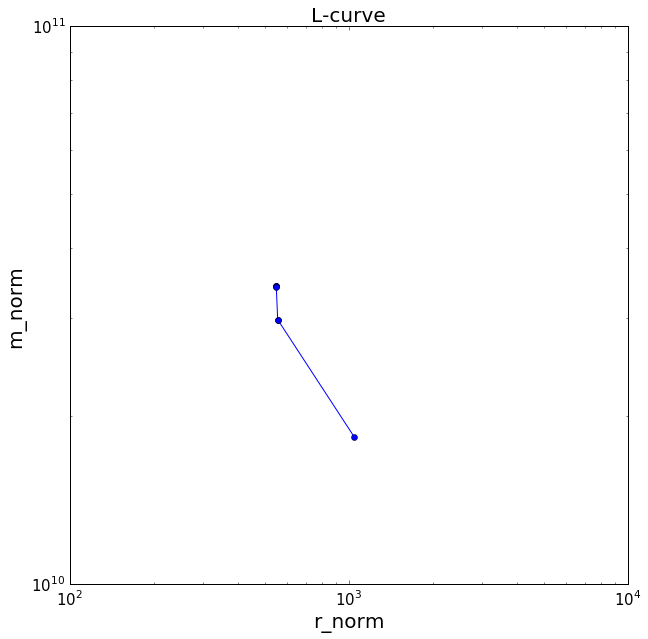

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/regular/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_reg['magnetic_moment'] = m_est
result_RM_reg['inc_est'] = incl_est
result_RM_reg['dec_est'] = decl_est
result_RM_reg['layer_depth'] = h
result_RM_reg['reg_parameter'] = mu_list
result_RM_reg['phi'] = phi_list

#### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_reg['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_reg.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_reg, f)
    
saved_files.append(file_name)


### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/Lcurve_RM.png
2  figs/regular/Lcurve_RM.eps
3  data/result_RM_reg.pickle
